# Model training and evaluation

In [161]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
import graphviz

# multiclass classifiers
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

In [2]:
df = pd.read_csv('data/static_01.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30702 entries, 0 to 30701
Columns: 5528 entries, category_position to 5514
dtypes: float64(5516), int64(12)
memory usage: 1.3 GB


In [4]:
df.sample(5)

,category_position,days_duration,days_preparation,db_duration,goal,usd_goal,class,image_count,video_kickstarter_count,video_youtube_count,...,5505,5506,5507,5508,5509,5510,5511,5512,5513,5514
4867,14,60,135,60,6500.0,6500,2,6,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29362,3,29,26,29,18000.0,21237,3,4,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21202,2,44,180,45,30000.0,30000,4,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29804,8,33,8,33,50000.0,2817,4,49,2,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4993,11,30,644,30,12000.0,12000,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# split to train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.30, random_state=16)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21491 entries, 3764 to 6825
Columns: 5527 entries, category_position to 5514
dtypes: float64(5516), int64(11)
memory usage: 906.4 MB


In [7]:
X_train.head()

,category_position,days_duration,days_preparation,db_duration,goal,usd_goal,image_count,video_kickstarter_count,video_youtube_count,video_count,...,5505,5506,5507,5508,5509,5510,5511,5512,5513,5514
3764,12,30,54,30,20000.0,20000,2,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24880,9,60,13,60,350000.0,18661,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3294,15,30,1,30,5000.0,5000,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22737,2,30,63,30,35000.0,35000,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15138,9,60,1,60,9500.0,9500,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1. LinearSVC

In [8]:
cls = LinearSVC()
cls = cls.fit(X_train, y_train)

In [9]:
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})

array([[2333,  408,  101, 1047],
       [ 393,   97,   32,  651],
       [ 551,  128,   69, 1332],
       [ 343,  118,   39, 1569]], dtype=int64)

In [10]:
cls.score(X_train, y_train)

0.4461402447536178

In [11]:
cls.score(X_test, y_test)

0.44164585821300617

## 2. DecisionTreeClassifier

In [151]:
cls = DecisionTreeClassifier(random_state=42) # , class_weight={1: 1, 2:3.239, 3:1.836, 4:1.874}

In [152]:
cls = cls.fit(X_train, y_train)

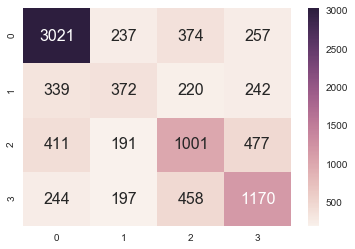

In [153]:
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})

In [154]:
cls.score(X_train, y_train)

0.99990693778791118

In [155]:
cls.score(X_test, y_test)

0.60406036260992291

In [ ]:
dot_data = tree.export_graphviz(cls, out_file=None, feature_names=X_train.columns, class_names=['1','2','3','4'],filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("kickstarter3")

## 3. RandomForestClassifier

In [156]:
cls = RandomForestClassifier(random_state=42)

In [157]:
cls = cls.fit(X_train, y_train)

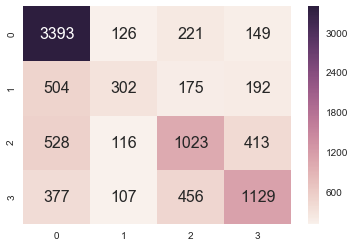

In [158]:
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})

In [159]:
cls.score(X_train, y_train)

0.9875296635801033

In [160]:
cls.score(X_test, y_test)

0.63478449679730753

## 4. KNeighborClassifier

In [170]:
cls = KNeighborsClassifier()

In [171]:
cls = cls.fit(X_train, y_train)

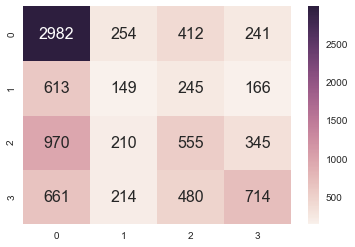

In [172]:
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})

In [173]:
cls.score(X_train, y_train)

0.62975198920478337

In [174]:
cls.score(X_test, y_test)

0.47768971881446098

## 5. NearestCentroid

In [176]:
cls = NearestCentroid()

In [177]:
cls = cls.fit(X_train, y_train)

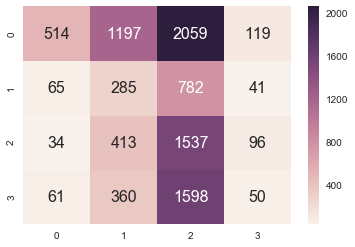

In [178]:
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})

In [179]:
cls.score(X_train, y_train)

0.26555302219533761

In [180]:
cls.score(X_test, y_test)

0.25903810661165999

## 6. LogisticRegression

In [183]:
cls = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=42)

In [184]:
cls = cls.fit(X_train, y_train)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


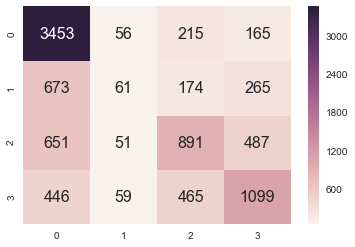

In [185]:
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})

In [186]:
cls.score(X_train, y_train)

0.63426550649108926

In [187]:
cls.score(X_test, y_test)

0.59754641189881663

## 7. RidgeClassifier

In [188]:
cls = RidgeClassifier(random_state=42)

In [189]:
cls = cls.fit(X_train, y_train)

C:\Users\Patrik\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.583746690549714e-18 / 1.1102230246251565e-16
  RuntimeWarning)


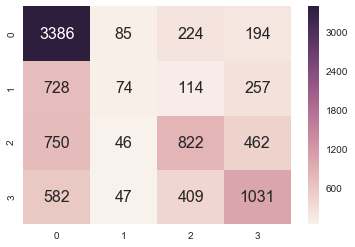

In [190]:
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})

In [191]:
cls.score(X_train, y_train)

0.66413847657158809

In [192]:
cls.score(X_test, y_test)

0.57681033546846161